In [1]:
import pandas as pd
import seaborn as sns
import math
import random

In [2]:
df = pd.read_csv('cars.csv')
df.head()

,car_model,miles_driven,age,sales_price
0,Honda Civic,73268,3,1631.800176
1,Tesla Model 3,48567,1,4641.246511
2,Honda Civic,47613,8,4733.002231
3,Ford F150,50891,6,4410.106119
4,Nissan Altima,26243,1,6311.304951


In [3]:
testIdx = []
while len(testIdx) < 10:
    num = random.randint(0, len(df)-1)
    if not num in testIdx:
        if df.loc[num, "miles_driven"] < 80000:
            testIdx.append(num)

testIdx

[39, 69, 52, 22, 74, 93, 80, 77, 45, 30]

In [4]:
trainDF = df.drop(testIdx).reset_index(drop=True)
testDF = df.iloc[testIdx].reset_index(drop=True)

<Axes: xlabel='age', ylabel='sales_price'>

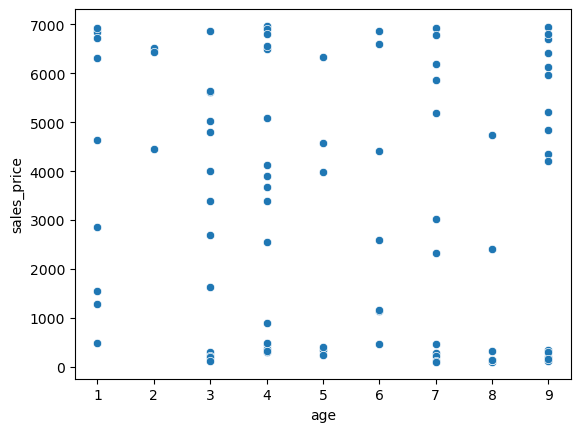

In [5]:
#little to no correlation between age and sales_price, so age will be dismissed as a possible contributor
sns.scatterplot(data=trainDF, x='age', y='sales_price')

<Axes: xlabel='miles_driven', ylabel='sales_price'>

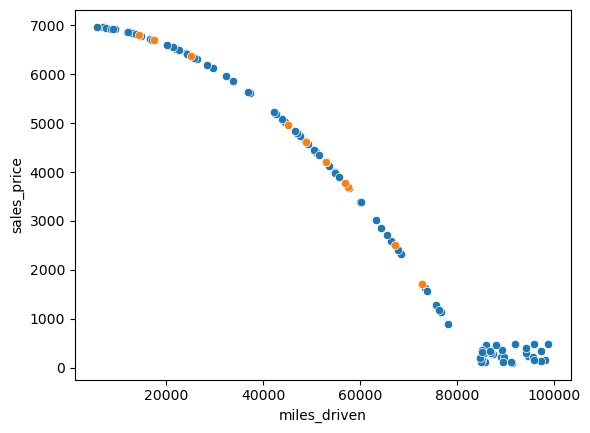

In [6]:
sns.scatterplot(data=trainDF, x='miles_driven', y='sales_price')
sns.scatterplot(data=testDF, x='miles_driven', y='sales_price')

In [7]:
print(str(min(df['miles_driven'])))

5797


In [8]:
#equasion to use : A(x-H)^2 + B
#A must be between -0.000002 and -0.000001
#B must be between 6750 and 7250
#H must be between 5750 and 5850

#randomly select values for A and B
def trainModel():
    A = round(random.uniform(-0.000002, -0.000001),10)
    B = round(random.uniform(6750, 7250),3)
    H = round(random.uniform(5750, 5850),3)
    return A, H, B

# A, H, B = trainModel()
# print("equation: " + str(A) + "(x - " + str(H) + ")^2 + " + str(B))

In [12]:
def testModel(testDF, A, B, H):
    testNums = []
    for i in range(len(testDF)):
        actual = testDF.loc[i, 'sales_price']
        estimate = ((A) * (testDF.loc[i, 'miles_driven'] - H)**2 + B)
        testNums.append((actual - estimate)**2)
       
    return (sum(testNums) / len(testNums))**0.5

rmseMins = {'rmse':[], 'A':[], 'H':[], 'B':[]}
rmseMins = pd.DataFrame(rmseMins)
for i in range(50):
    rmseNums = {'rmse':[], 'A':[], 'H':[], 'B':[]}
    rmseNums = pd.DataFrame(rmseNums)
    for j in range(1000):
        A, H, B = trainModel()
        rmse = testModel(testDF, A, H, B)
        A = str(A)
        locDF = {'rmse': [rmse], 'A': [A], 'H':[H], 'B':[B]}
        locDF = pd.DataFrame(locDF)
        rmseNums = pd.concat([rmseNums, locDF], ignore_index=True)
        #print(rmse, A, H, B)
    minRMSE = min(rmseNums['rmse'])
    minIdx = rmseNums.index[rmseNums['rmse'] == minRMSE]
    rmseMins = pd.concat([rmseMins, rmseNums.loc[minIdx]], ignore_index=True)

In [13]:
rmseMins.head()

,rmse,A,H,B
0,627.032443,-1.0009e-06,5848.592,6910.750
1,640.985568,-1.0036e-06,5821.928,7156.289
2,629.791518,-1.0052e-06,5845.085,7008.775
3,629.650492,-1.0093e-06,5844.178,7112.230
4,636.764839,-1.0031e-06,5847.072,6805.280


In [14]:
minimum = min(rmseMins['rmse'])
minIdx = rmseMins.index[rmseMins['rmse'] == minimum]
rmseMins.loc[minIdx]

,rmse,A,H,B
64,612.145158,-1.0045e-06,5849.954,7243.061
